In [33]:
# import all
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial.distance import cdist

In [34]:
# read the data -- using country data
X = pd.read_table("C:/Users/ghosh/Google Drive/personal_project/machine_learning_cluestering/clust-master/db2.csv", sep=";")

In [35]:
X

,Country,Control of Corruption,Government Effectiveness,Political Stability,Regulatory Quality,Rule of Law,Voice and Accountability
0,Afghanistan,-1.340411,-1.335604,-2.502350,-1.008351,-1.592565,-1.152141
1,Albania,-0.444014,0.027830,0.357206,0.198663,-0.359367,0.159348
2,Algeria,-0.681529,-0.506218,-1.046453,-1.169924,-0.831184,-0.852513
3,Andorra,1.246003,1.752355,1.436771,0.892059,1.594601,1.208872
4,Angola,-1.396893,-1.012036,-0.590507,-0.908264,-1.069294,-1.185755
...,...,...,...,...,...,...,...
191,Venezuela. RB,-1.328256,-1.220161,-1.007378,-1.857714,-1.990581,-1.121985
192,Vietnam,-0.447043,0.076964,0.010676,-0.496354,-0.268542,-1.328915
193,Yemen. Rep.,-1.448112,-1.640891,-2.632358,-1.101016,-1.237937,-1.493853
194,Zambia,-0.405139,-0.554479,0.085539,-0.422344,-0.252827,-0.112754


In [36]:
# set country as index
X.set_index('Country', inplace=True)

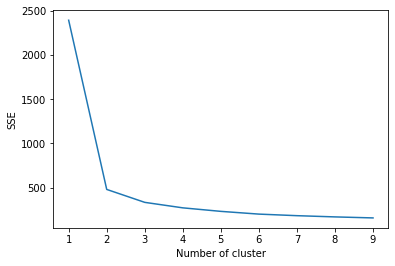

In [68]:
# plot Elbow method, using sum of distance
# Inertia: It is the sum of squared distances of samples to their closest cluster center.
sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init=1000, max_iter=10000, precompute_distances=True, n_jobs=-1).fit(X)
    X["clusters"] = kmeans.labels_
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

In [38]:
print(sse.keys(), sse.values())

dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9]) dict_values([1185.67852687703, 480.0285863406351, 333.56701136379036, 271.4390245624956, 231.56374633752603, 200.5141810717205, 182.75795116140335, 168.8864584176883, 157.40612349138127])


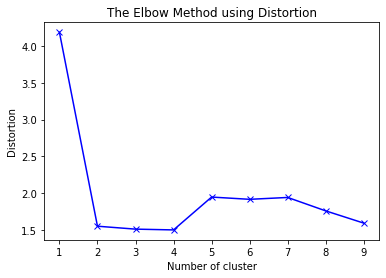

In [69]:
# plot elbow method using 
# Distortion: It is calculated as the average of the squared distances from the cluster centers of the respective clusters. 
# Typically, the Euclidean distance metric is used.
sse_dis = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init=1000, max_iter=10000, precompute_distances=True, n_jobs=-1).fit(X)
    X["clusters"] = kmeans.labels_
    sse_dis[k] = sum(np.min(cdist(X, kmeans.cluster_centers_, 'euclidean'),axis=1)) / X.shape[0] 
plt.figure()
plt.plot(list(sse_dis.keys()), list(sse_dis.values()), 'bx-')
plt.xlabel("Number of cluster")
plt.ylabel("Distortion")
plt.title('The Elbow Method using Distortion') 
plt.show()


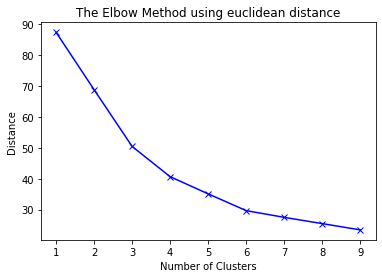

In [73]:
distance=[]
K = range(1,10)
for k in K:
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init=1000, max_iter=10000, precompute_distances=True, n_jobs=-1).fit(X)
    kmeans.fit(X)
    distance.append(sum(np.min(cdist(X, kmeans.cluster_centers_, 'euclidean'),axis=1)) / X.shape[1]) 

plt.plot(K, distance, 'bx-')
plt.xlabel('Number of Clusters')
plt.ylabel('Distance')
plt.title('The Elbow Method using euclidean distance') 
plt.show()

In [80]:
# Let use k=2 and build the cluster
km=KMeans(n_clusters=2, init='k-means++', n_init=1000, max_iter=10000, precompute_distances=True, n_jobs=-1).fit(X)
result = dict(zip(X.index, km.labels_))
print(result.values())
plt.figure()
plt.plot(list(result.keys()), list(result.values()))
# plt.xlabel("Number of cluster")
# plt.ylabel("SSE")
plt.show()

dict_values([1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1])


In [81]:
plt.scatter(X[km.labels == 0, 0], X[km.labels == 0, 1],c='green', label='cluster 1')

AttributeError: 'KMeans' object has no attribute 'labels'

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]


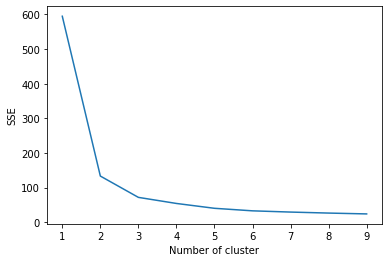

In [38]:
# iris data
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris['feature_names'])
print(X)
data = X[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)']]

sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(data)
    data["clusters"] = kmeans.labels_
    #print(data["clusters"])
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()